# **1. Imports**
---
- Importing libraries
    - Sklearn

In [144]:
# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 
from sklearn.linear_model import LogisticRegression

# Tree based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Boosting models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# SVM
from sklearn.svm import SVC

# Pipeline and transformer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
# oversampeling
from imblearn.over_sampling import SMOTE


# train test split
from sklearn.model_selection import train_test_split

# cross val
from sklearn.model_selection import cross_val_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# **2. Data inspection**
---

In [145]:
df = pd.read_csv("Telco.csv")

In [146]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [147]:
df.drop(['customerID'], axis= 1, inplace= True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [149]:
df['TotalCharges'] = df['TotalCharges'][ df['TotalCharges'] != ' ']

In [150]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

# **2.1 Inspecting for missing values and duplicates**
---


In [151]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [152]:
df.duplicated().sum()

22

In [153]:
df.drop_duplicates(inplace=True)

In [154]:
df.dropna(inplace= True)

# **2.2 Checking cardanility and info of the data**
---

In [155]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7010,7010.000000,7010,7010,7010.000000,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010.000000,7010.000000,7010
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3535,NaN,3617,4911,NaN,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,NaN,NaN,5153
mean,NaN,0.162767,NaN,NaN,32.520399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.888666,2290.353388,NaN
std,NaN,0.369180,NaN,NaN,24.520441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.064769,2266.820832,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.750000,408.312500,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,1403.875000,NaN
75%,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,3807.837500,NaN


In [156]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7010,2,Male,3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7010.0,NaN,NaN,NaN,0.162767,0.36918,0.0,0.0,0.0,0.0,1.0
Partner,7010,2,No,3617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7010,2,No,4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7010.0,NaN,NaN,NaN,32.520399,24.520441,1.0,9.0,29.0,56.0,72.0
PhoneService,7010,2,Yes,6330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7010,3,No,3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7010,3,Fiber optic,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7010,3,No,3489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7010,3,No,3079,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **EDA**
---

# Numerical data EDA
---

In [157]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=[object]).columns.tolist()

cat_cols = cat_cols[:-1]

In [158]:
cat_cols.insert(0, num_cols[0])


In [159]:
num_cols.pop(0)

'SeniorCitizen'

In [160]:
print(f"category columns :  {cat_cols}")
print(f"Numeric columns  : {num_cols}")

category columns :  ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric columns  : ['tenure', 'MonthlyCharges', 'TotalCharges']


(array([1503.,  672.,  512.,  458.,  454.,  316.,  276.,  201.,  194.,
         170.,  179.,  159.,  147.,  162.,  145.,  136.,  159.,  117.,
         121.,  146.,  128.,  108.,  102.,  100.,   83.,   74.,   66.,
          64.,   36.,   22.]),
 array([  18.8       ,  307.66666667,  596.53333333,  885.4       ,
        1174.26666667, 1463.13333333, 1752.        , 2040.86666667,
        2329.73333333, 2618.6       , 2907.46666667, 3196.33333333,
        3485.2       , 3774.06666667, 4062.93333333, 4351.8       ,
        4640.66666667, 4929.53333333, 5218.4       , 5507.26666667,
        5796.13333333, 6085.        , 6373.86666667, 6662.73333333,
        6951.6       , 7240.46666667, 7529.33333333, 7818.2       ,
        8107.06666667, 8395.93333333, 8684.8       ]),
 <BarContainer object of 30 artists>)

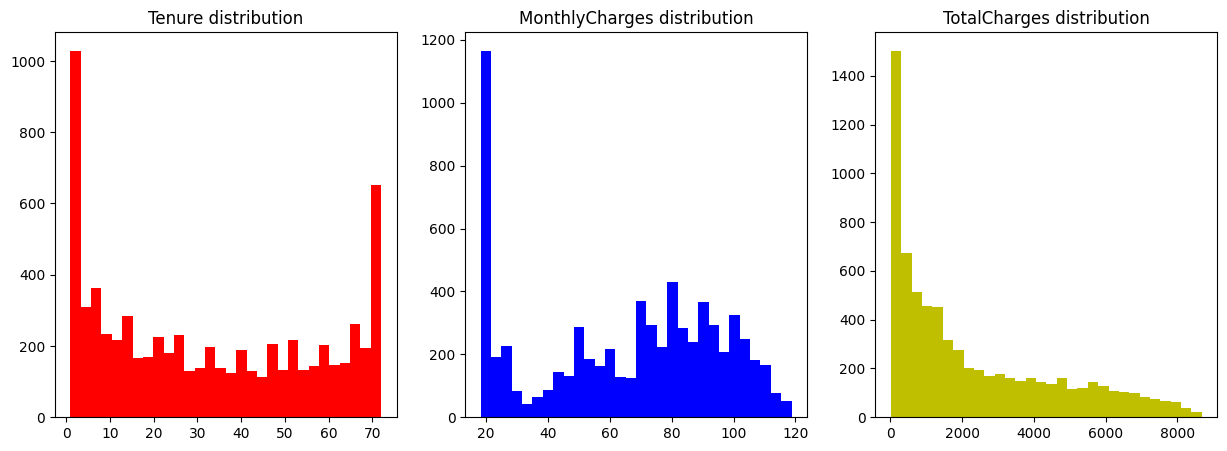

In [161]:
plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
plt.title("Tenure distribution")
plt.hist(df[num_cols[0]], bins = 30, color= 'r')


plt.subplot(1,3, 2)
plt.title('MonthlyCharges distribution')
plt.hist(df[num_cols[1]], bins = 30, color= 'b')


plt.subplot(1,3, 3)
plt.title('TotalCharges distribution')
plt.hist(df[num_cols[2]], bins = 30, color= 'y')

mostly right schelwd

<Axes: title={'center': 'TotalCharges distribution'}, ylabel='TotalCharges'>

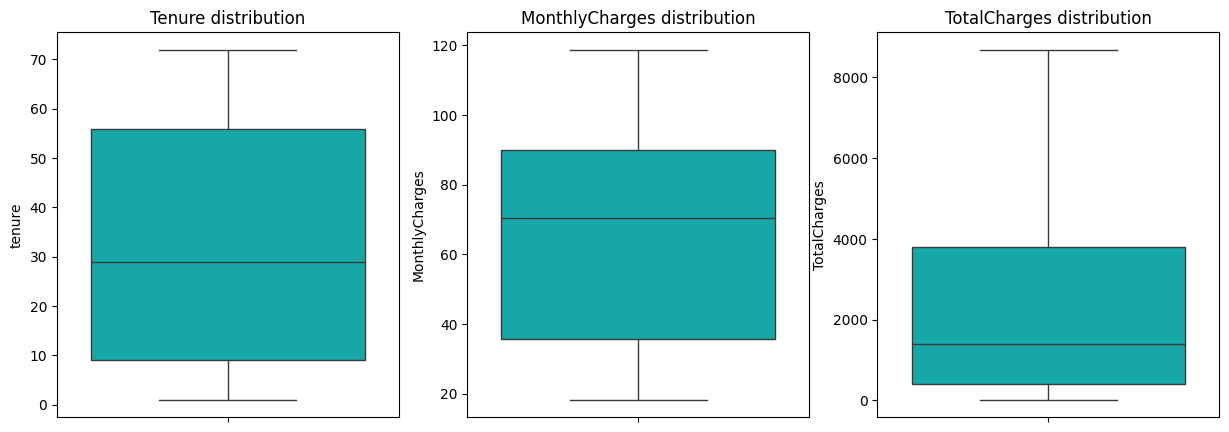

In [162]:
plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
plt.title("Tenure distribution")
sns.boxplot(df[num_cols[0]],color= 'c')


plt.subplot(1,3, 2)
plt.title('MonthlyCharges distribution')
sns.boxplot(df[num_cols[1]], color= 'c')


plt.subplot(1,3, 3)
plt.title('TotalCharges distribution')
sns.boxplot(df[num_cols[2]], color= 'c')

In [163]:
# Identify outliers in each column with Z-Score.
from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))
z_scores_df = pd.DataFrame(z_scores, columns=num_cols)

z_scores_df.where(z_scores_df > 3)

,tenure,MonthlyCharges,TotalCharges
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
7038,NaN,NaN,NaN
7039,NaN,NaN,NaN
7040,NaN,NaN,NaN
7041,NaN,NaN,NaN


# not outliers

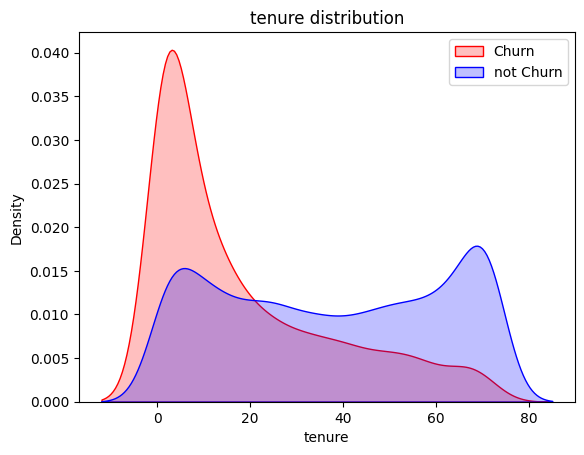

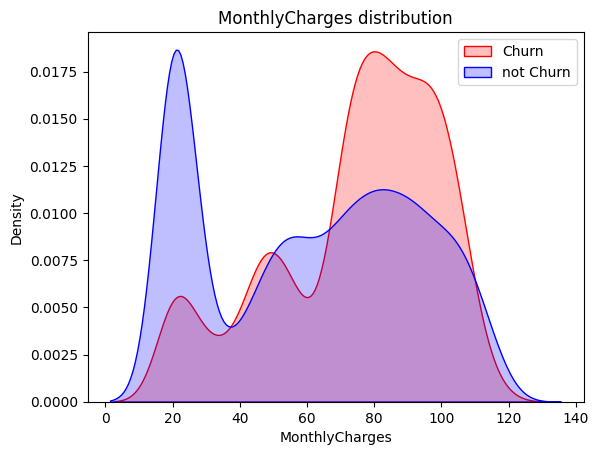

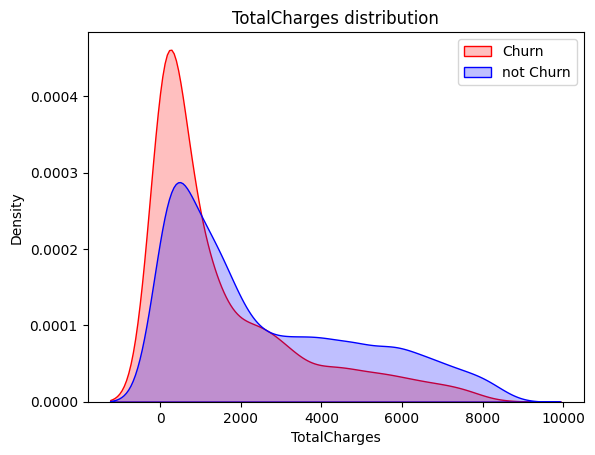

In [164]:
for col in num_cols:
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], color= 'red', fill=True, label = "Churn")
    sns.kdeplot(df[df['Churn'] == 'No'][col], color= 'blue', fill=True, label = "not Churn")
    plt.title(f"{col} distribution")
    plt.legend()
    plt.show()

# insights
- people with lower tenure tend to churn more
- the higher the monthly payment the higher churn

# Categorical Data EDA
---

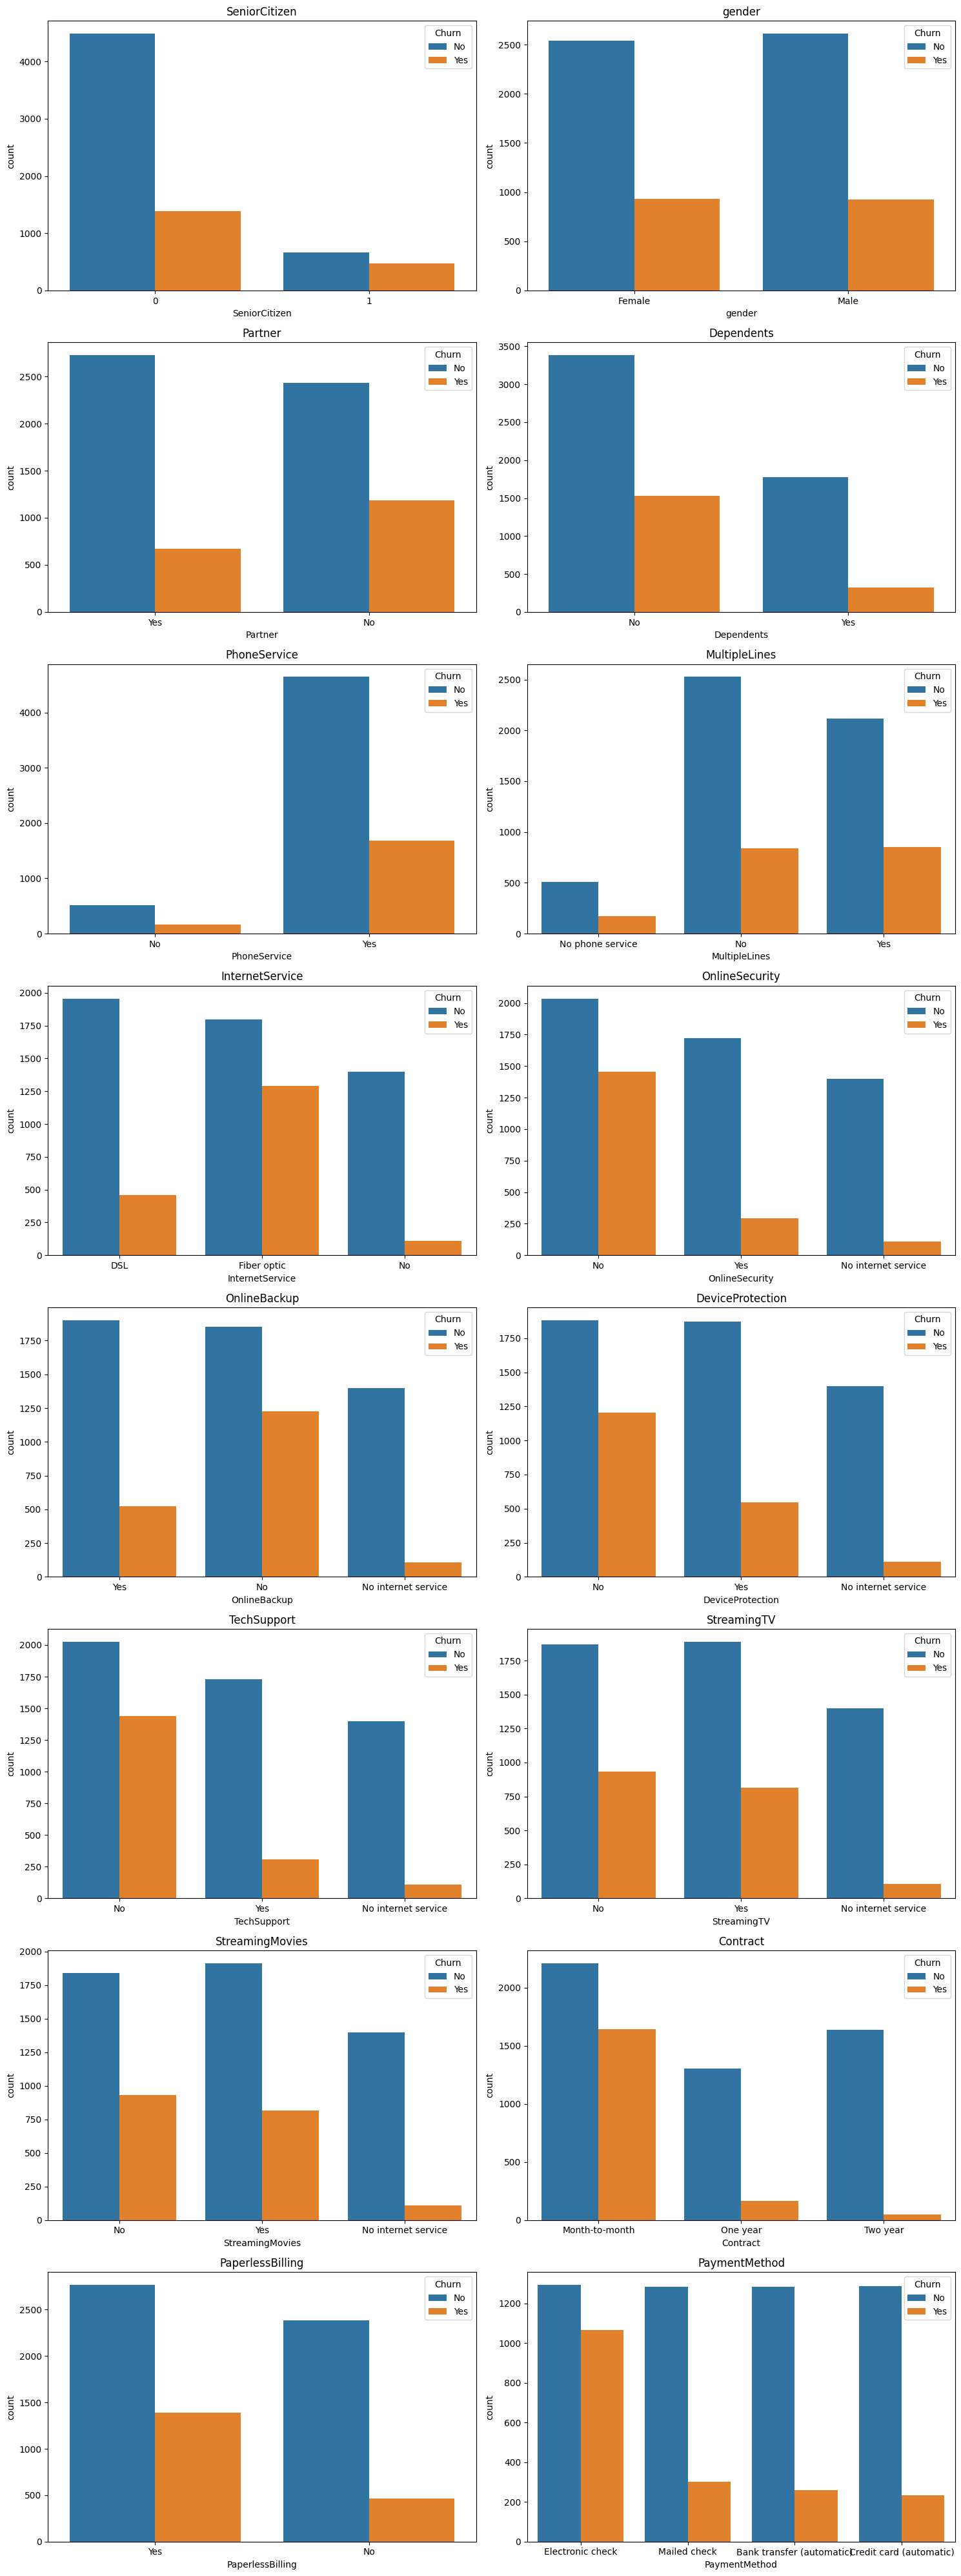

In [165]:
plt.figure(figsize= (15,40))

for index,col in enumerate(cat_cols):
    plt.subplot(8,2, 1 + index)
    plt.title(col)
    sns.countplot(data = df, x = col, hue='Churn')
    plt.tight_layout()


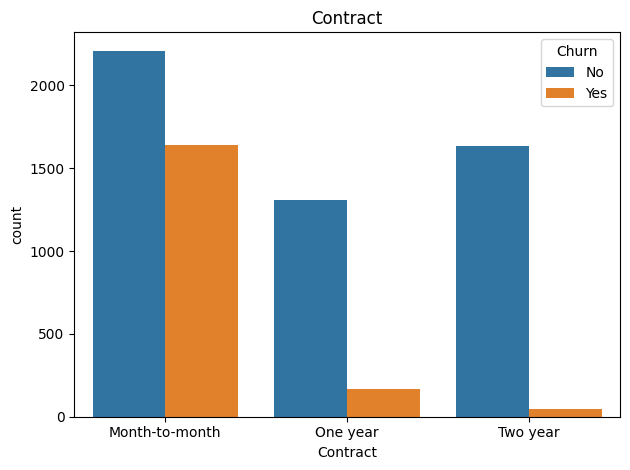

In [166]:
# plt.figure(figsize=(10,5))
plt.title('Contract')
sns.countplot(data = df, x = 'Contract', hue='Churn')
plt.tight_layout()

# **Fiber optic churn**
---

In [167]:
internet_df = df.groupby('InternetService')[num_cols].agg('mean').sort_values(by = 'MonthlyCharges', ascending= False)

In [168]:
internet_df = pd.DataFrame(internet_df).reset_index()

Text(0.5, 1.0, 'monthly charges for each internet service')

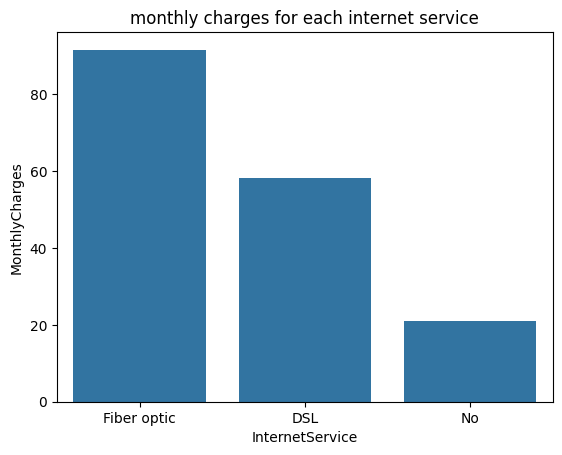

In [169]:
sns.barplot(data= internet_df, x = 'InternetService', y = 'MonthlyCharges')
plt.title('monthly charges for each internet service')

# Why people with month to month tend to churn more?

In [170]:
num_cols
#df.groupby('Contract')['tenure'].mean()

['tenure', 'MonthlyCharges', 'TotalCharges']

In [171]:
mean_score_df = df.groupby('Contract')[num_cols].agg('mean').round(2)

median_score_df = df.groupby('Contract')[num_cols].agg('median')
median_score_df


,tenure,MonthlyCharges,TotalCharges
Contract,,,
Month-to-month,12.0,73.55,697.65
One year,44.0,68.75,2657.55
Two year,64.0,64.45,3623.95


(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

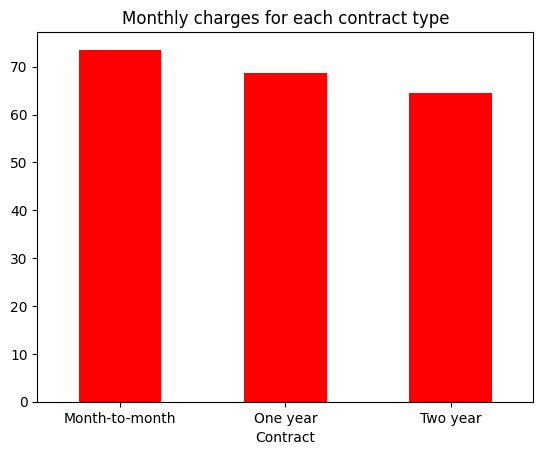

In [172]:
median_score_df['MonthlyCharges'].plot(kind='bar', color = 'r')
plt.title("Monthly charges for each contract type")
plt.xticks(rotation = 0)

In [173]:
mean_score_df

,tenure,MonthlyCharges,TotalCharges
Contract,,,
Month-to-month,18.13,66.57,1376.87
One year,42.07,65.08,3034.68
Two year,57.07,60.87,3728.93


In [174]:
median_score_df

,tenure,MonthlyCharges,TotalCharges
Contract,,,
Month-to-month,12.0,73.55,697.65
One year,44.0,68.75,2657.55
Two year,64.0,64.45,3623.95


In [175]:
mean_score_df

,tenure,MonthlyCharges,TotalCharges
Contract,,,
Month-to-month,18.13,66.57,1376.87
One year,42.07,65.08,3034.68
Two year,57.07,60.87,3728.93


In [176]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

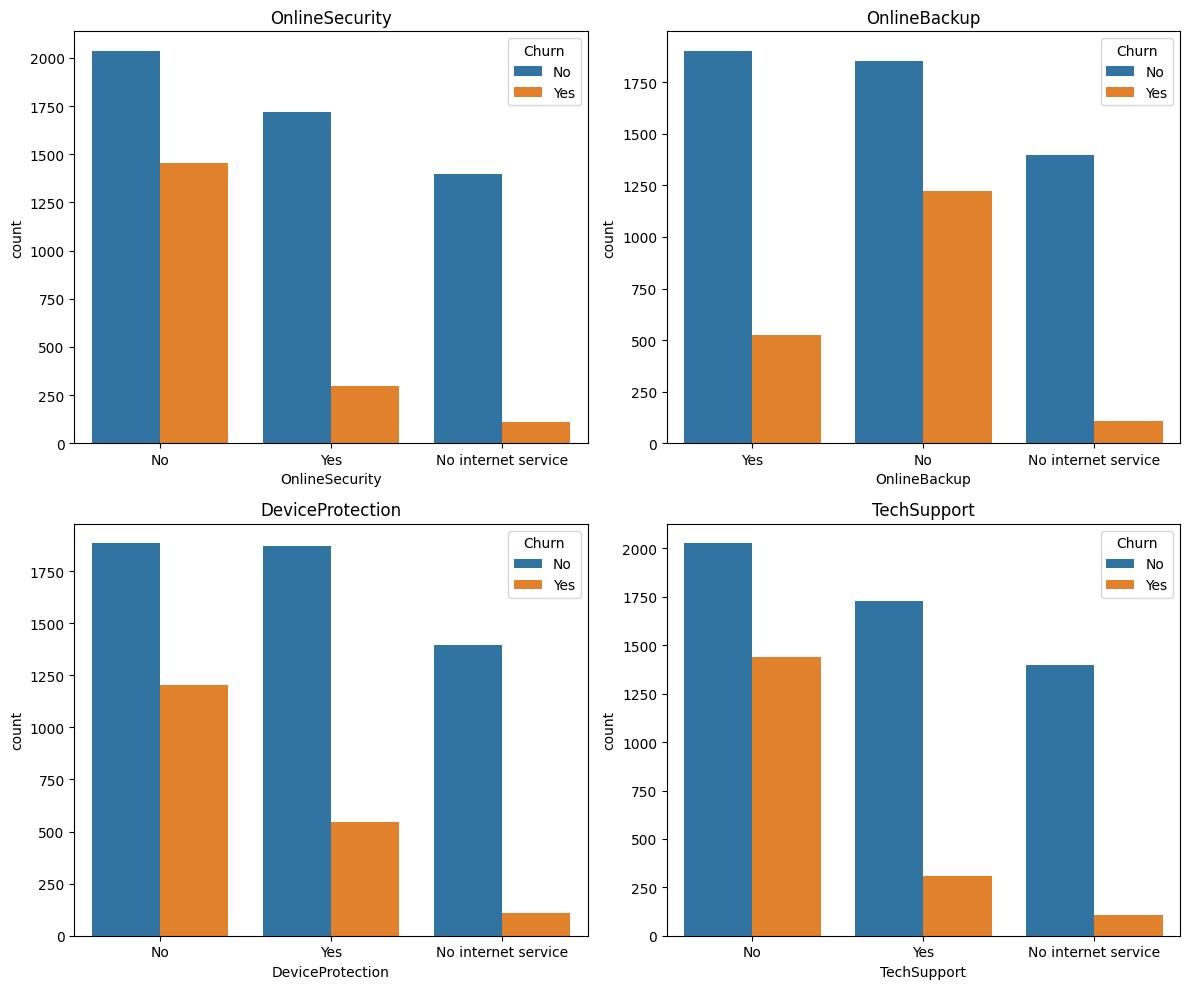

In [177]:
benefit = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport']

plt.figure(figsize=(12,10))

for i,cl in enumerate(benefit):
    plt.subplot(2,2, i + 1)
    plt.title(cl)
    sns.countplot(data = df, x = cl, hue='Churn')
    plt.tight_layout()

# Insights

People who use fiber optic internet service churn more 


list : 
online security
device protection 
techsupport
online backup
people without on of these tent to churn more

people who is a month to month tend to churn more

and the electronic check have the highest churn rate

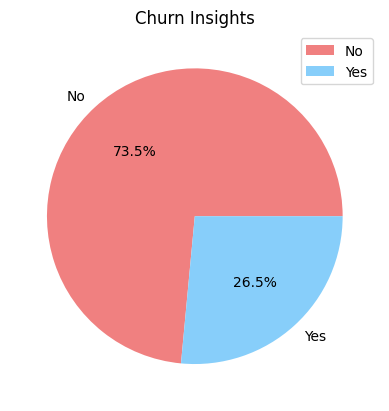

In [178]:
df["Churn"].value_counts().plot(kind= "pie", autopct='%1.1f%%', colors = ["lightcoral","lightskyblue"])

plt.ylabel("")
plt.legend()
plt.title("Churn Insights")
plt.savefig("churn_pie.png", transparent=True)

# Train test split
---

In [179]:
x = df.drop(['Churn'], axis= 1)
y = df['Churn']

In [180]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size= 0.8 , random_state= 42)

In [181]:
x_train.drop(['gender','SeniorCitizen'], axis= 1, inplace= True)
x_test.drop(['gender','SeniorCitizen'], axis= 1, inplace= True)

# **Modeling**
---

In [182]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [183]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [184]:
cat_cols[2:]

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [185]:
scaler = MinMaxScaler()
ohe = OneHotEncoder()

model = LogisticRegression()

final_transformer = ColumnTransformer( transformers=[
    ("scaled", scaler, num_cols),
    ("ohe", ohe, cat_cols[2:])
])

final = Pipeline([
    ("Transform", final_transformer),
    ("Smote", SMOTE()),
    ("model", model)
])

In [186]:
final.fit(x_train,y_train)

Pipeline(steps=[('Transform',
                 ColumnTransformer(transformers=[('scaled', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('Smote', SMOTE()), ('model', LogisticRegression())])

In [187]:
y_pred = final.predict(x_test)

In [188]:
hasil = classification_report(y_test,y_pred)
print(hasil)

              precision    recall  f1-score   support

          No       0.93      0.74      0.82      1081
         Yes       0.48      0.81      0.60       321

    accuracy                           0.76      1402
   macro avg       0.71      0.78      0.71      1402
weighted avg       0.83      0.76      0.77      1402



# Model selection

In [189]:
model1  = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = XGBClassifier()
model5 = SVC(kernel= 'linear')
model6 = LGBMClassifier()

model_list = [
    ('LogisticRegression', model1),
    ('DecisionTree', model2),
    ('RandomForest', model3),
    ('XGBoost', model4),
    ('SVC_Linear', model5),
    ('LGBMClassifier', model6)
]

In [190]:
y_train = y_train.map({"Yes" : 1, "No" : 0})
y_test = y_test.map({"Yes" : 1, "No" : 0})

In [191]:
y_test

6882    0
6752    0
245     0
1889    0
6830    0
       ..
5732    0
2584    0
3140    0
2697    0
5280    0
Name: Churn, Length: 1402, dtype: int64

In [192]:
y_train

1328    0
5716    0
1906    0
6687    1
1880    1
       ..
3787    0
5210    1
5246    1
5410    0
862     1
Name: Churn, Length: 5608, dtype: int64

In [201]:
best_model = "none"
best_score = 1000

for name,models in model_list:
    print(f"🚀 finding best model")
    print(f"Using the {name} model to predict")
    
    final = Pipeline([
    ("Transform", final_transformer),
    ("Smote", SMOTE()),
    ("model", models)
    ])
    
    
    final.fit(x_train,y_train)
    
    y_pred = final.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    f1s = f1_score(y_test,y_pred)
    ps = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    
    if(best_score > recall):
        best_model = name
        best_score = recall
        
    print(f"✅ The {name} have a recall : {recall}\n")

print(f"⭐ The model winner is {best_model}") 
print(f"With a recall score of : {best_score}")

🚀 finding best model
Using the LogisticRegression model to predict
✅ The LogisticRegression have a recall : 0.8130841121495327

🚀 finding best model
Using the DecisionTree model to predict
✅ The DecisionTree have a recall : 0.5950155763239875

🚀 finding best model
Using the RandomForest model to predict
✅ The RandomForest have a recall : 0.5669781931464174

🚀 finding best model
Using the XGBoost model to predict
✅ The XGBoost have a recall : 0.6292834890965732

🚀 finding best model
Using the SVC_Linear model to predict
✅ The SVC_Linear have a recall : 0.822429906542056

🚀 finding best model
Using the LGBMClassifier model to predict
[LightGBM] [Info] Number of positive: 4072, number of negative: 4072
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2391
[LightGBM] [Info] Number of data points in the train set: 8144, number of used features: 42
[Li

In [202]:
best_modelns = "none"
best_scorens = 1000

for name,models in model_list:
    print(f"🚀 finding best model")
    print(f"Using the {name} model to predict")
    
    final = Pipeline([
    ("Transform", final_transformer),
    ("model", models)
    ])
    
    
    final.fit(x_train,y_train)
    
    y_pred = final.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    f1s = f1_score(y_test,y_pred)
    ps = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    
    if(best_scorens > recall):
        best_modelns = name
        best_scorens = recall
        
    print(f"✅ The {name} have a recall : {recall}\n")

print(f"⭐ The model winner is {best_modelns}") 
print(f"With a recall score of : {best_scorens}")

🚀 finding best model
Using the LogisticRegression model to predict
✅ The LogisticRegression have a recall : 0.5856697819314641

🚀 finding best model
Using the DecisionTree model to predict
✅ The DecisionTree have a recall : 0.5109034267912772

🚀 finding best model
Using the RandomForest model to predict
✅ The RandomForest have a recall : 0.4953271028037383

🚀 finding best model
Using the XGBoost model to predict
✅ The XGBoost have a recall : 0.5482866043613707

🚀 finding best model
Using the SVC_Linear model to predict
✅ The SVC_Linear have a recall : 0.5825545171339563

🚀 finding best model
Using the LGBMClassifier model to predict
[LightGBM] [Info] Number of positive: 1536, number of negative: 4072
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of dat

In [225]:
model = RandomForestClassifier()

final_NO_SMOTE = Pipeline([
("Transform", final_transformer),
("model", model)
])

final_NO_SMOTE.fit(x_train,y_train)

Pipeline(steps=[('Transform',
                 ColumnTransformer(transformers=[('scaled', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', RandomForestClassifier())])

In [222]:
final_SMOTE = Pipeline([
("Transform", final_transformer),
("smote", SMOTE()),
("model", model)
])

final_SMOTE.fit(x_train,y_train)

Pipeline(steps=[('Transform',
                 ColumnTransformer(transformers=[('scaled', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE()), ('model', RandomForestClassifier())])

SMOTE

<Axes: title={'center': 'Confusion matrix smote'}>

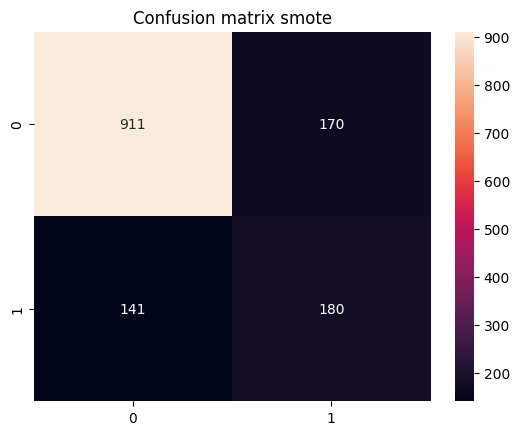

In [232]:
plt.title("Confusion matrix smote")

y_smote = final_SMOTE.predict(x_test)

hasil_smote = confusion_matrix(y_test,y_smote)

sns.heatmap(hasil_smote, annot= True, fmt="d")

<Axes: title={'center': 'Confusion matrix tanpa smote'}>

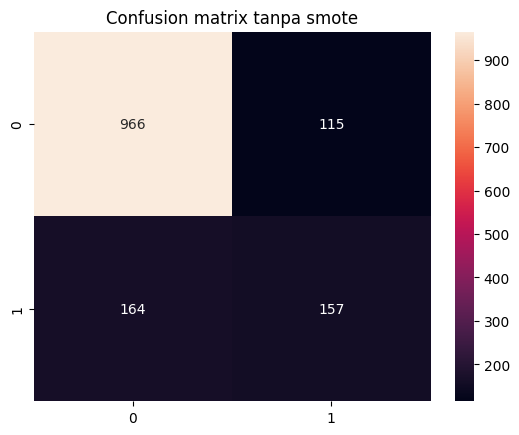

In [235]:
plt.title("Confusion matrix tanpa smote")

y_nsmote = final_NO_SMOTE.predict(x_test)

hasil_no_smote = confusion_matrix(y_test,y_nsmote)

sns.heatmap(hasil_no_smote, annot= True, fmt="d")

In [236]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "model__n_estimators" : [100,200,3000],
    "model__max_depth" : [5,12,15],
    "model__min_samples_leaf" : [1,3,5],
    "model__min_samples_split" : [2,5,7],
}

rs = RandomizedSearchCV(
    estimator=final_SMOTE,
    param_distributions=params,
    n_jobs=-1,
    cv=5,            # <-- Using normal 5-fold cross-validation
    n_iter=50,       # Number of parameter settings to sample
    scoring='recall', # Choose an appropriate scoring metric (e.g., 'accuracy', 'f1', 'roc_auc')
    random_state=42, # For reproducibility
    verbose=1, # Provides progress updates
)

# Fit the RandomizedSearchCV object to your training data to start the search
print("Starting Randomized Search...")
rs.fit(x_train, y_train)
print("Search complete.")

# Access and print the results
print(f"Best parameters found for smote: {rs.best_params_}")
print(f"Best score achieved during CV: {rs.best_score_:.4f}")


Starting Randomized Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Search complete.
Best parameters found for smote: {'model__n_estimators': 200, 'model__min_samples_split': 7, 'model__min_samples_leaf': 3, 'model__max_depth': 5}
Best score achieved during CV: 0.7799


In [237]:
rs2 = RandomizedSearchCV(
    estimator= final_NO_SMOTE,
    param_distributions=params,
    n_jobs=-1,
    cv=5,            # <-- Using normal 5-fold cross-validation
    n_iter=50,       # Number of parameter settings to sample
    scoring='recall', # Choose an appropriate scoring metric (e.g., 'accuracy', 'f1', 'roc_auc')
    random_state=42, # For reproducibility
    verbose=1, # Provides progress updates
)

# Fit the RandomizedSearchCV object to your training data to start the search
print("Starting Randomized Search...")
rs2.fit(x_train, y_train)
print("Search complete.")

# Access and print the results
print(f"Best parameters found for no smote: {rs2.best_params_}")
print(f"Best score achieved during CV: {rs2.best_score_:.4f}")


Starting Randomized Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Search complete.
Best parameters found for no smote: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 12}
Best score achieved during CV: 0.5247
